<a href="https://colab.research.google.com/github/sravankoyyada/Quantum_Computing_D-wave_major_project/blob/main/K_Mean_Clustering_image_compress_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

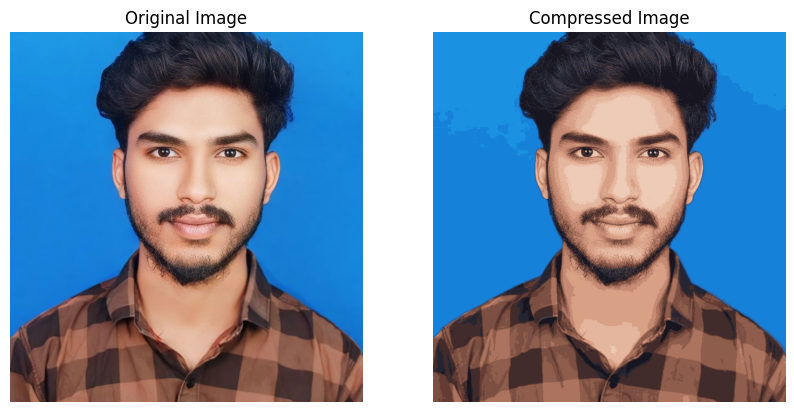

In [ ]:
!pip install Pillow
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def compress_image(image_path, k=16):
    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Reshape image into 2D array (pixels, channels)
    pixels = image.reshape((-1, 3))

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pixels)

    # Replace each pixel color with its centroid
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    compressed_pixels = np.clip(compressed_pixels.astype('uint8'), 0, 255)

    # Reshape to original image shape
    compressed_image = compressed_pixels.reshape(image.shape)

    return image, compressed_image

def display_images(original, compressed):
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    # Compressed Image
    plt.subplot(1, 2, 2)
    plt.imshow(compressed)
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()

# Example usage
image_path = '/content/myPhoto.jpg'   # Replace with your image path
original, compressed = compress_image(image_path, k=16)
display_images(original, compressed)


K-MEAN CLUSTERING (IMAGE COMPRESSION) Quantum Computing Annealing


In [ ]:
pip install dwave-ocean-sdk numpy opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.6/158.6 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.6/225.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import cv2
from dwave.system import DWaveSampler, EmbeddingComposite
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min

# Load and preprocess the image
def load_image(image_path, resize_shape=(64, 64)):
    # Load the image and resize it to a smaller size for demonstration
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, resize_shape)
    # Flatten the image into a 2D array where each row represents a pixel (RGB)
    img_flattened = img_resized.reshape((-1, 3))
    return img_flattened

# Function to create the QUBO matrix for K-means clustering
def create_qubo(data, k, max_iter=100):
    # Initialize some parameters for creating a QUBO
    n = len(data)
    distances = pairwise_distances_argmin_min(data, data[:k])[0]

    # Placeholder for QUBO matrix, which needs to be filled based on the clustering optimization
    Q = np.zeros((n, n))

    # Fill in QUBO matrix (this step needs more work to be exact, it's simplified here)
    # For now, we're simulating the minimization of distances
    for i in range(n):
        for j in range(i + 1, n):
            distance = np.linalg.norm(data[i] - data[j])
            Q[i, j] = Q[j, i] = distance  # Symmetric QUBO

    return Q

# Compress the image using Quantum Annealing (D-Wave)
def compress_image_quantum(image_path, k=8):
    data = load_image(image_path)

    # Normalize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Create QUBO matrix for K-means clustering using quantum annealing
    Q = create_qubo(data_scaled, k)

    # D-Wave sampler for quantum annealing
    sampler = DWaveSampler()
    embedding = EmbeddingComposite(sampler)

    # Perform quantum annealing
    response = embedding.sample_qubo(Q, num_reads=100)
    best_sample = response.first.sample

    # Assign the image pixels to the closest cluster centroids
    compressed_data = np.array([best_sample[i] for i in range(len(data_scaled))])
    compressed_img = scaler.inverse_transform(compressed_data).reshape((64, 64, 3))

    # Save or display the compressed image
    cv2.imwrite('compressed_image.png', compressed_img)
    return compressed_img

# Main function to run the compression of image
if __name__ == '__main__':
    compressed_img = compress_image_quantum('/content/myPhoto.jpg')
    print("Image compression completed!")


# New section